<a href="https://colab.research.google.com/github/IKosovych/ucu-recommender-system-2023/blob/master/ExploratoryDataAnalysis/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# !pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.6 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np

import plotly.express as px

import math

In [2]:
df_movies = pd.read_csv(
    'movies.dat',
    sep = "::",
    names = ['movieId', 'title', 'genres'],
    encoding='latin-1',
    engine='python',
)
df_ratings = pd.read_csv(
  'ratings.dat',
    sep = "::",
    names = ['userId', 'movieId', 'rating', 'timestamp'],
    engine='python',
)
# df_tags = pd.read_csv('tags.csv')
# df_links = pd.read_csv('links.csv')

In [3]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
df_init = df_ratings.merge(df_movies, left_on='movieId', right_on='movieId')
df = df_init.copy()

In [6]:
df

,userId,movieId,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,White Boys (1999),Drama
1000207,5851,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [7]:
# count of movies
len(df['movieId'].value_counts())

3706

In [8]:
# count of users
len(df['userId'].value_counts())

6040

## In the real-world, ratings are very sparse and data points are mostly collected from very popular movies and highly engaged users (long-tail property).

In [9]:
df_movies_ratings = pd.DataFrame(df.groupby(by=['movieId'])['rating'].count().sort_values(ascending=False)).reset_index(drop=True)

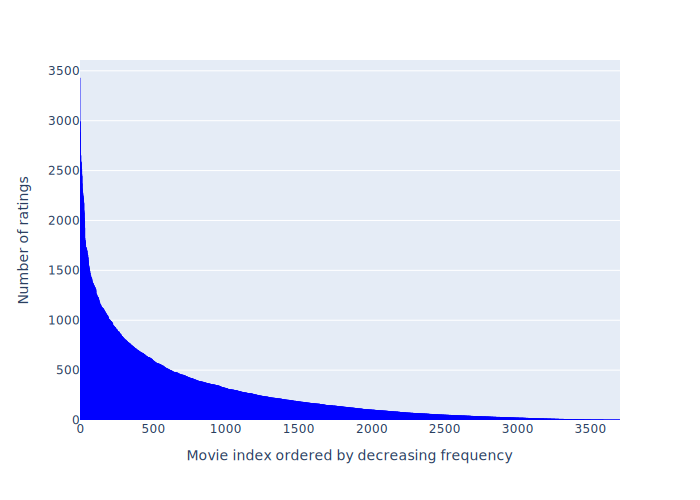

In [10]:
fig = px.bar(df_movies_ratings, x=df_movies_ratings.index, y='rating',
             labels = {'index': 'Movie index ordered by decreasing frequency',
                       'rating': 'Number of ratings'})
fig.update_traces(marker_color = 'blue', marker_line_color = 'blue')
fig.show('svg')

In [11]:
df_user_ratings = df.groupby(by=['userId'])['rating'].count().sort_values(ascending=False).reset_index(drop=True)

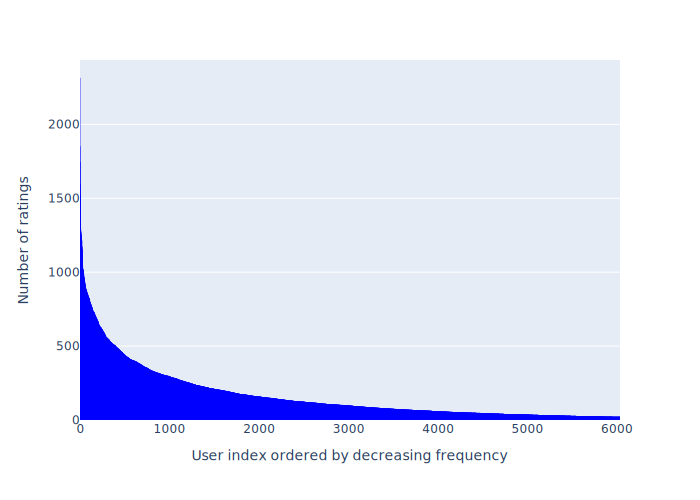

In [12]:
fig = px.bar(df_user_ratings, x=df_user_ratings.index, y='rating',
             labels = {'index': 'User index ordered by decreasing frequency',
                       'rating': 'Number of ratings'})
fig.update_traces(marker_color = 'blue', marker_line_color = 'blue')
fig.show('svg')

## Ratings` distribution

In [13]:
df_1 = df.copy()
df_1['new_rating'] = df_1['rating'].apply(lambda x: x if math.modf(x)[0] == 0 else x + 0.1)
df_ratings = pd.DataFrame(np.round(df_1['new_rating']).value_counts()).reset_index(drop=False).rename(columns={
    'index': 'rating',
    'new_rating': 'count'}).sort_values(by=['rating'], ascending=False)
df_ratings['rating'] = ['5 stars', '4 stars', '3 stars', '2 stars', '1 star']

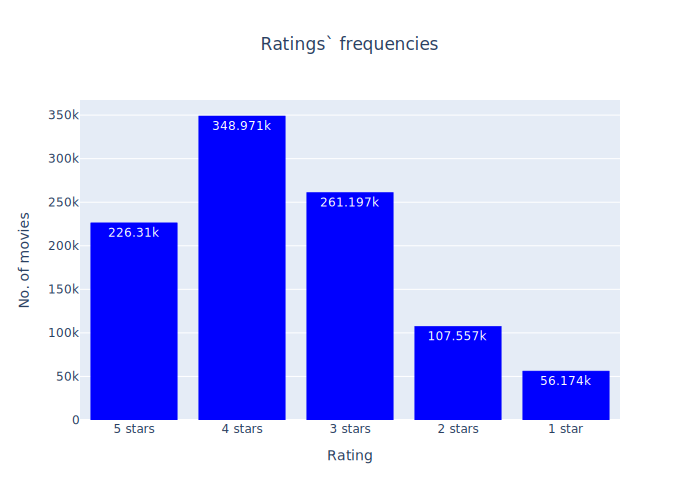

In [14]:
fig = px.bar(df_ratings, x="rating", y='count',
             labels = {'count': 'No. of movies',
                       'rating': 'Rating'},
             text_auto = True,
             title="Ratings` frequencies")
fig.update_traces(marker_color = 'blue', marker_line_color = 'blue')
fig.update_layout(title_x=0.5)
fig.show('svg')

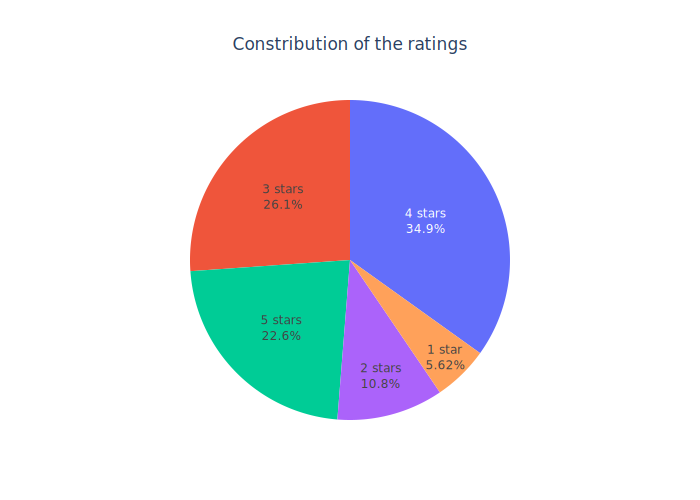

In [15]:
fig = px.pie(df_ratings, names="rating", values='count',
             title = 'Constribution of the ratings')
fig.update_traces(textposition='inside', textinfo='percent+label', showlegend=False)
fig.update_layout(title_x=0.5)
fig.show('svg')

## Genres` distribution

In [16]:
df_1['split_genres'] = df_1['genres'].apply(lambda x: x.split('|'))

In [17]:
from itertools import chain
genres_list = list(chain(*list(df_1['split_genres'])))
genres = pd.DataFrame(pd.Series(genres_list).value_counts())

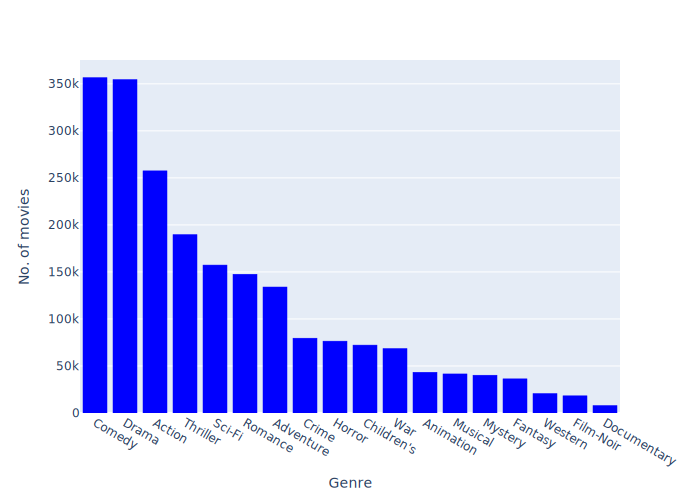

In [18]:
fig = px.bar(genres, x=genres.index, y=0,
             labels = {'0': 'No. of movies',
                       'index': 'Genre'})
fig.update_traces(marker_color = 'blue', marker_line_color = 'blue')
fig.show('svg')

## Top movies

In [19]:
df_movies_stats_1 = df[['title', 'rating']].groupby(by=['title']).mean().reset_index(drop=False).rename(columns={
    'rating': 'avg. rating'})
df_movies_stats_2 = df[['title', 'rating']].groupby(by=['title']).count().reset_index(drop=False).rename(columns={
    'rating': 'no. of users who rated'})

df_movies_stats = df_movies_stats_1.merge(df_movies_stats_2, left_on='title', right_on='title')

In [20]:
# TOP-10 most popular movies
df_movies_stats.sort_values(by=['no. of users who rated'], ascending=False)[:10]

,title,avg. rating,no. of users who rated
127,American Beauty (1999),4.317386,3428
3153,Star Wars: Episode IV - A New Hope (1977),4.453694,2991
3154,Star Wars: Episode V - The Empire Strikes Back...,4.292977,2990
3155,Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
1789,Jurassic Park (1993),3.763847,2672
2894,Saving Private Ryan (1998),4.337354,2653
3293,Terminator 2: Judgment Day (1991),4.058513,2649
2112,"Matrix, The (1999)",4.315830,2590
258,Back to the Future (1985),3.990321,2583
2990,"Silence of the Lambs, The (1991)",4.351823,2578


In [21]:
# TOP-10 high-rated movies
df_movies_stats.sort_values(
    by=['avg. rating'], ascending=False)[:10]

,title,avg. rating,no. of users who rated
3477,Ulysses (Ulisse) (1954),5.0,1
2025,Lured (1947),5.0,1
1203,Follow the Bitch (1998),5.0,1
407,Bittersweet Motel (2000),5.0,1
3087,Song of Freedom (1936),5.0,1
2453,One Little Indian (1973),5.0,1
3044,Smashing Time (1967),5.0,2
2903,Schlafes Bruder (Brother of Sleep) (1995),5.0,1
1297,"Gate of Heavenly Peace, The (1995)",5.0,3
249,"Baby, The (1973)",5.0,1


In [22]:
# TOP-10 high-rated movies (at least by 10 users)
df_movies_stats[df_movies_stats['no. of users who rated']>=10].sort_values(
    by=['avg. rating'], ascending=False)[:10]

,title,avg. rating,no. of users who rated
2883,Sanjuro (1962),4.608696,69
2940,Seven Samurai (The Magnificent Seven) (Shichin...,4.560510,628
2970,"Shawshank Redemption, The (1994)",4.554558,2227
1354,"Godfather, The (1972)",4.524966,2223
713,"Close Shave, A (1995)",4.520548,657
3504,"Usual Suspects, The (1995)",4.517106,1783
2901,Schindler's List (1993),4.510417,2304
3675,"Wrong Trousers, The (1993)",4.507937,882
3218,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.491489,470
2711,Raiders of the Lost Ark (1981),4.477725,2514


## Top-10 popular movies in TOP-3 popular genres

In [23]:
df_2 = df_1[['userId', 'movieId', 'rating', 'title', 'split_genres']].copy()

In [24]:
one_hot_encoded = pd.get_dummies(df_2['split_genres'].apply(pd.Series).stack()).sum(level=0)

<ipython-input-24-c36a1b19da0c>:1: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



In [25]:
df_genres = pd.concat([df_2[['userId', 'movieId', 'rating', 'title']], one_hot_encoded], axis=1)

#### Drama

In [26]:
df_drama = df_genres[df_genres['Drama']==1]

In [27]:
df = df_drama
df_movies_stats_1 = df[['title', 'rating']].groupby(by=['title']).mean().reset_index(drop=False).rename(columns={
    'rating': 'avg. rating'})
df_movies_stats_2 = df[['title', 'rating']].groupby(by=['title']).count().reset_index(drop=False).rename(columns={
    'rating': 'no. of users who rated'})

df_movies_stats = df_movies_stats_1.merge(df_movies_stats_2, left_on='title', right_on='title')

In [28]:
# TOP-10 most popular movies
df_movies_stats.sort_values(by=['no. of users who rated'], ascending=False)[:10]

,title,avg. rating,no. of users who rated
46,American Beauty (1999),4.317386,3428
1268,Star Wars: Episode V - The Empire Strikes Back...,4.292977,2990
1169,Saving Private Ryan (1998),4.337354,2653
1211,"Silence of the Lambs, The (1991)",4.351823,2578
464,Fargo (1996),4.254676,2513
195,Braveheart (1995),4.234957,2443
1175,Schindler's List (1993),4.510417,2304
410,E.T. the Extra-Terrestrial (1982),3.965183,2269
1203,"Shawshank Redemption, The (1994)",4.554558,2227
553,"Godfather, The (1972)",4.524966,2223


#### Comedy

In [29]:
df_comedy = df_genres[df_genres['Comedy']==1]

In [30]:
df = df_comedy
df_movies_stats_1 = df[['title', 'rating']].groupby(by=['title']).mean().reset_index(drop=False).rename(columns={
    'rating': 'avg. rating'})
df_movies_stats_2 = df[['title', 'rating']].groupby(by=['title']).count().reset_index(drop=False).rename(columns={
    'rating': 'no. of users who rated'})

df_movies_stats = df_movies_stats_1.merge(df_movies_stats_2, left_on='title', right_on='title')

In [31]:
# TOP-10 most popular movies
df_movies_stats.sort_values(by=['no. of users who rated'], ascending=False)[:10]

,title,avg. rating,no. of users who rated
46,American Beauty (1999),4.317386,3428
90,Back to the Future (1985),3.990321,2583
680,Men in Black (1997),3.739953,2538
935,Shakespeare in Love (1998),4.127480,2369
852,"Princess Bride, The (1987)",4.303710,2318
449,Groundhog Day (1993),3.953029,2278
115,Being John Malkovich (1999),4.125390,2241
392,Forrest Gump (1994),4.087967,2194
420,Ghostbusters (1984),3.905548,2181
1067,Toy Story (1995),4.146846,2077


#### Action

In [32]:
df_action = df_genres[df_genres['Action']==1]

In [33]:
df = df_action
df_movies_stats_1 = df[['title', 'rating']].groupby(by=['title']).mean().reset_index(drop=False).rename(columns={
    'rating': 'avg. rating'})
df_movies_stats_2 = df[['title', 'rating']].groupby(by=['title']).count().reset_index(drop=False).rename(columns={
    'rating': 'no. of users who rated'})

df_movies_stats = df_movies_stats_1.merge(df_movies_stats_2, left_on='title', right_on='title')

In [34]:
# TOP-10 most popular movies
df_movies_stats.sort_values(by=['no. of users who rated'], ascending=False)[:10]

,title,avg. rating,no. of users who rated
409,Star Wars: Episode IV - A New Hope (1977),4.453694,2991
410,Star Wars: Episode V - The Empire Strikes Back...,4.292977,2990
411,Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
225,Jurassic Park (1993),3.763847,2672
370,Saving Private Ryan (1998),4.337354,2653
441,Terminator 2: Judgment Day (1991),4.058513,2649
270,"Matrix, The (1999)",4.315830,2590
274,Men in Black (1997),3.739953,2538
339,Raiders of the Lost Ark (1981),4.477725,2514
67,Braveheart (1995),4.234957,2443


## Data Preperation for modeling

In [35]:
df_dataset = df_init.pivot(index='movieId',columns='userId',values='rating')
df_dataset.fillna(0,inplace=True)
dataset = np.array(df_dataset)

In [36]:
# rows - movies
# columns - users
dataset.shape

(3706, 6040)

In [37]:
dataset

array([[5., 0., 0., ..., 0., 0., 3.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Check dataset sparsity

In [38]:
sparsity = 1.0 - (np.count_nonzero(dataset) / float(dataset.size))
print(f"Sparsity of the dataset is {np.round(sparsity, 2)*100} %")

Sparsity of the dataset is 96.0 %
